In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

np.random.seed(42)

### Generate DataSet

In [0]:
def dataset(n = 10, sigma=1, m=4):
    
    centers = ([0,0,0,0,0,0,0,0], [m,0,0,0,0,0,0,0], [0,0,0,m,0,0,0,0], [0,0,0,0,0,0,0,m])

    n_dim = len(centers[0])
    dt = []
    labels = []
    for i in range(len(centers)):
        #for each center we generate n samples with additive standard gaussian noise
        for _ in range(n):    
            dt.append(centers[i] + sigma*np.random.randn(1, n_dim).reshape(n_dim, ))
            labels.append(i)

    data = np.append(dt, np.array(labels).reshape(4*n, 1), axis=1)
    
    return np.array(data)


In [0]:
dt = dataset(10000) #1000 samples for each center with noise


### Building a keras autoencoder

In [0]:
#train dataset and labels

dt_train = dt[:, :8]
labels = dt[:, 8]

In [0]:
encoding_dim = 2

def build_autoencoder():
  # this is our input placeholder
  input_img = Input(shape=(dt_train.shape[-1],))
  # "encoded" is the encoded representation of the input
  hidden_encoded = Dense(8, activation='tanh')(input_img)
  #encoded = Dense(encoding_dim, activation='tanh')(hidden_encoded)
  encoded = Dense(encoding_dim)(hidden_encoded)

  # "decoded" is the lossy reconstruction of the input
  hidden_decoded = Dense(8, activation='tanh')(encoded)
  #decoded = Dense(8)(encoded)
  decoded = Dense(8)(hidden_decoded)

  # this model maps an input to its reconstruction
  autoencoder = Model(input_img, decoded)

  # this model maps an input to its encoded representation
  encoder = Model(input_img, encoded)

  autoencoder.compile(optimizer='rmsprop', loss='mse')
  return autoencoder, encoder

In [64]:
auto1, encoder1 = build_autoencoder()

auto1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 72        
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist1 = auto1.fit(dt_train, dt_train, epochs=50, batch_size=64, verbose=0)


In [66]:
mse = hist1.history['loss']

mse[-1]

0.750197428226471

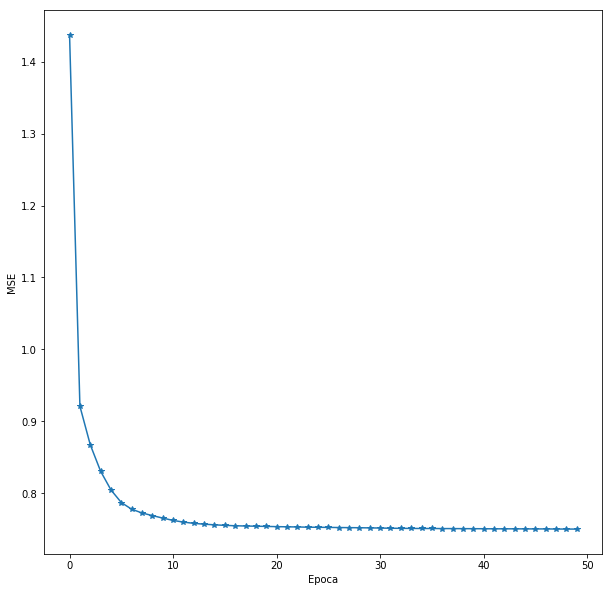

In [67]:
#how well was the traning per epoch?

plt.plot(range(len(mse)), mse, '*-')
plt.xlabel("Epoca")
plt.ylabel("MSE")
plt.savefig("mse_epoch.png", dpi=300)

### Predicting encoded data and plotting

##### Predicting

In [0]:
dt_2d = encoder1.predict(dt_train)

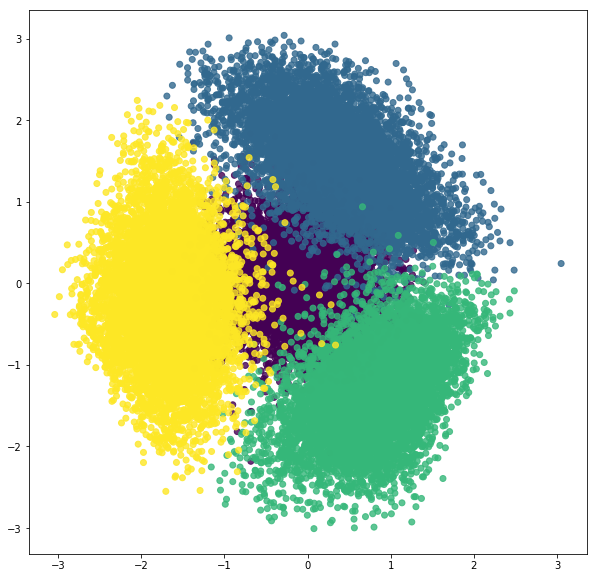

In [69]:
plt.scatter(dt_2d[:,0], dt_2d[:,1], c=labels, alpha=0.8)
plt.savefig("2d_simple.png", dpi=300)
#plt.axis([-2, 6, -2, 6])

In [0]:
dt2 = dataset(10000, m=16) #1000 samples for each center with noise
#train dataset and labels

dt_train2 = dt2[:, :8]
labels2 = dt2[:, 8]

In [0]:
auto2, encoder2 = build_autoencoder()
hist2 = auto2.fit(dt_train2, dt_train2, epochs=50, batch_size=64, verbose=0)

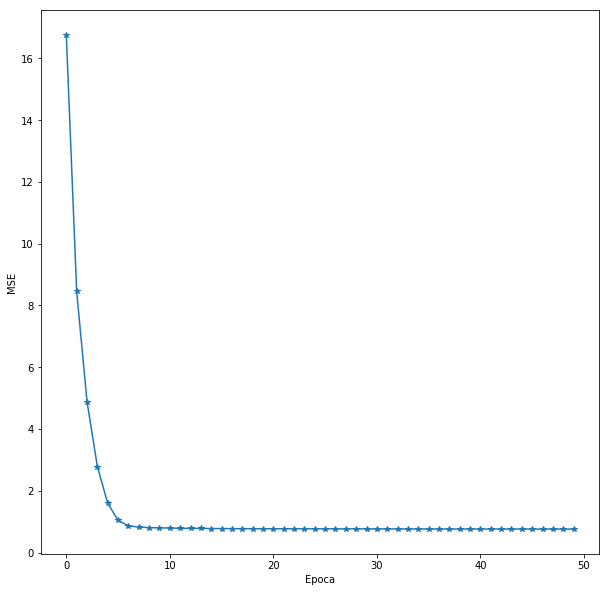

In [72]:
#how well was the traning per epoch?

mse2 = hist2.history['loss']
plt.plot(range(len(mse2)), mse2, '*-')
plt.xlabel("Epoca")
plt.ylabel("MSE")
plt.savefig("mse_epoch_m10.png", dpi=300)

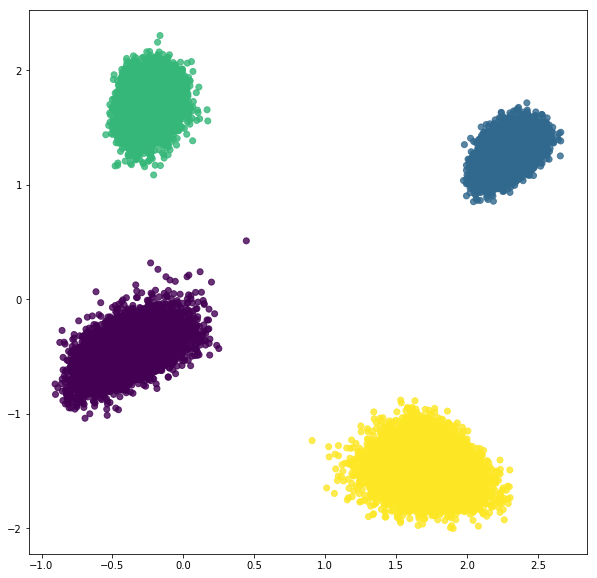

In [73]:
dt2_2d = encoder2.predict(dt_train2)
plt.scatter(dt2_2d[:,0], dt2_2d[:,1], c=labels2, alpha=0.8)
plt.savefig("2d_simple_m10.png", dpi=300)
#plt.axis([-2, 6, -2, 6])

In [0]:
dt3 = dataset(10000, sigma=0.10) #1000 samples for each center with noise
#train dataset and labels

dt_train3 = dt3[:, :8]
labels3 = dt3[:, 8]

In [0]:
auto3, encoder3 = build_autoencoder()
hist3 = auto3.fit(dt_train3, dt_train3, epochs=50, batch_size=64, verbose=0)

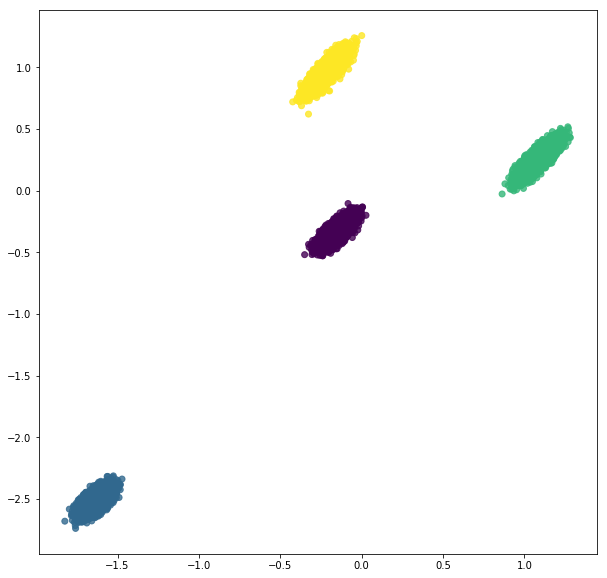

In [76]:
dt3_2d = encoder3.predict(dt_train3)
plt.scatter(dt3_2d[:,0], dt3_2d[:,1], c=labels3, alpha=0.8)
plt.savefig("2d_simple_sigma01.png", dpi=300)
#plt.axis([-2, 6, -2, 6])